# Computer Vision - P4

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P4_Student1_Student2.zip** that includes:
    - The notebook P4_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): November 24th, 23:00 h** 

## Before starting

In [2]:
# Libraries we will use for this practicum
import skimage
from skimage import io, img_as_float, transform
from skimage.feature import match_template, match_descriptors, plot_matches, CENSURE, ORB, hog
from skimage.color import rgb2gray
from skimage.transform import rotate
import numpy as np
from numpy.linalg import norm
from matplotlib import pyplot as plt

In [3]:
#visualize
def visualize2(tigre_f,tigre_x,label1,label2):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,2,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,2,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    
def visualize3(tigre_f,tigre_x,tigre_xb,label1,label2,label3):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,3,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,3,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    fig.add_subplot(1,3,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre_xb, cmap='gray')


def visualize4(tigre1,tigre2,tigre3,tigre4,label1,label2,label3,label4):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,4,1)
    plt.title(label1)
    plt.imshow(tigre1, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,4,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre2, cmap='gray')
    fig.add_subplot(1,4,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre3, cmap='gray')
    fig.add_subplot(1,4,4)
    plt.xticks([])
    plt.yticks([])
    plt.title(label4)
    plt.imshow(tigre4, cmap='gray')

==============================================================================================
## Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

In this laboratory we will treat the following main topics:

1) Template matching
    - Normalized Cross-correlation
    - Application to object (eye) detection 

2) Image Descriptors: "Sliding window" and HOG image descriptor
   - Application to object (person) detection

3) Image matching (recognition by correspondance) based on feature extraction (ORB)
    - Application to object (logo) detection
    
In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

All code should be commented in English. Answers of the questions and comments on the exercises should be given in English too.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

## 1 Template matching

1.1 Given the image 'einstein.png' and the template image 'eye.png', detect the location of the template in the image comparing the use of:
- euclidean distance (hint: norm() in numpy.linalg).
- normalized cross-correlation (hint: match_template() of skimage.feature).

Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

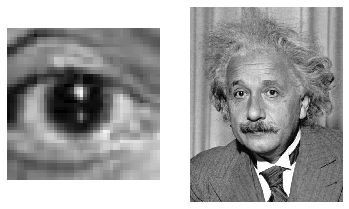

In [3]:
# Show the original image and the template image
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

plt.subplot(1,2,1)
eye=io.imread('./images/eye.png')
plt.imshow(eye)
plt.axis('off')

plt.subplot(1,2,2)
einstein=io.imread('./images/einstein.png')
plt.imshow(einstein)
plt.axis('off')

plt.show()

1.1. Create a function for template matching applying euclidean distance and normalized cross-correlation and display the results in this format:
    
<img src="images_notebook/tm.png" width="400" height="120">

**Use titles in all figures to understand what is being displayed.**

In [4]:
# Your solution here

# The functions we'll use for this part of the practicum

# The function euclidean_temp_match will match a template over an image using the euclidean distance
def euclidean_temp_match(image, template):
    # First of all, convert the image and the template to float and then to gray scale
    image_float = rgb2gray(img_as_float(image))
    template_float = rgb2gray(img_as_float(template))
    
    # Get the image and template shape
    img_y, img_x = image_float.shape[0], image_float.shape[1]
    temp_y, temp_x = template_float.shape[0], template_float.shape[1]
    
    # Create a new image to return based on the shapes obtained before
    # Note that we're creating a smaller image than our original image, this is because we don't want
    # to have problems when going through the image doing matching
    euclidean_image = np.zeros((img_y - temp_y, img_x - temp_x))
    
    # Filling the new image to return, with the same size restrictions
    for y in range(img_y - temp_y):
        for x in range(img_x - temp_x):            
            # We are using the Scikit-Image function norm in order to do the match
            # We're matching the template over a certain region of the image each iteration
            euclidean_image[y, x] = norm(template_float[:,:] - image_float[y:(y + temp_y), x:(x + temp_x)])
                
    # Return the new created image
    return euclidean_image

# The function cross_correlation_match will give us a normal cross-correlation matching of a template over an image
def cross_correlation_match(image, template):
    # First of all, convert the image and the template to float and then to gray scale    
    image_float = rgb2gray(img_as_float(image))
    template_float = rgb2gray(img_as_float(template))
    
    # Now, just return the match_template (Scikit-Image function) result
    # This will give us the normal cross-correlation of matching a template over an image
    return match_template(image_float, template_float)

# The function threshold_image will create a black and white image based on a threshold value
def threshold_image(image, threshold):
    # Create a new image to return based on the received image shape
    thresholded_image = np.zeros((image.shape[0], image.shape[1]))

    # Goind through the received image
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            # If the pixel value is lower than the threshold, set it white
            if image[y, x] < threshold:
                thresholded_image[y, x] = 1
            # If not, set it black
            else:
                thresholded_image[y, x] = 0
    
    # Finally, just return the thresholded image
    return thresholded_image

In [5]:
# Load the images
einstein_img = io.imread('./images/einstein.png')
eye_template = io.imread('./images/eye.png')

# Now, let's call the functions
euclidean_img = euclidean_temp_match(einstein_img, eye_template)
threshold_euc_img = threshold_image(euclidean_img, 8.6)

cross_correlated_img = cross_correlation_match(einstein_img, eye_template)
threshold_cross_img = threshold_image(cross_correlated_img, -0.45)

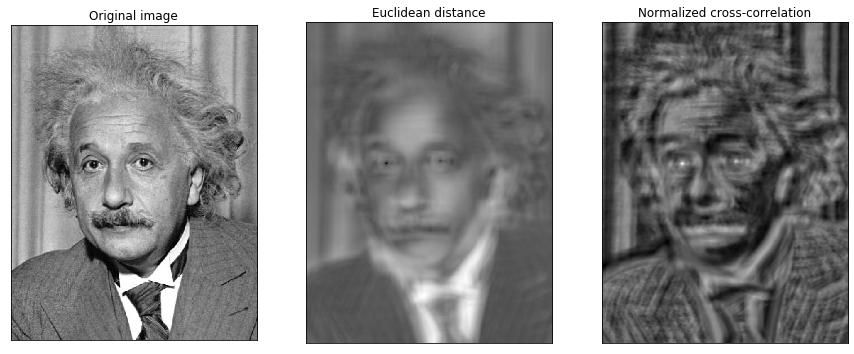

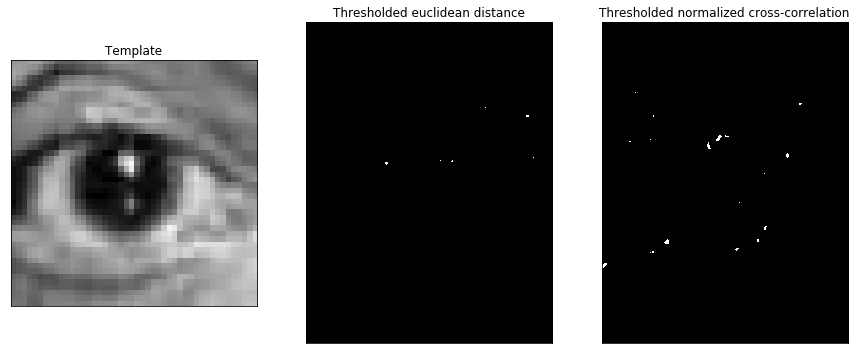

In [6]:
# And finally, just show all the images
visualize3(einstein_img, euclidean_img, cross_correlated_img, 'Original image', 'Euclidean distance', 'Normalized cross-correlation')
visualize3(eye_template, threshold_euc_img, threshold_cross_img, 'Template', 'Thresholded euclidean distance', 'Thresholded normalized cross-correlation')

How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)? To this purpose, read the images "einstein_br.png" and "einstein_mask.png".

Visualize the normalized cross-correlation image between the template and the image as well as this very same image in a binarized form in order to show where is the minimal distance between the template and the image. 

Use titles of the figures to explain what is displayed.


1.2 Display the results on `einstein_br.png`:

In [7]:
# Your solution here

# Load the image
einstein_brighter = io.imread('./images/einstein_br.png')

# Call the functions
euclidean_br_img = euclidean_temp_match(einstein_brighter, eye_template)
threshold_euc_br_img = threshold_image(euclidean_br_img, 8.6)

cross_correlated_br_img = cross_correlation_match(einstein_brighter, eye_template)
threshold_cross_br_img = threshold_image(cross_correlated_br_img, -0.45)

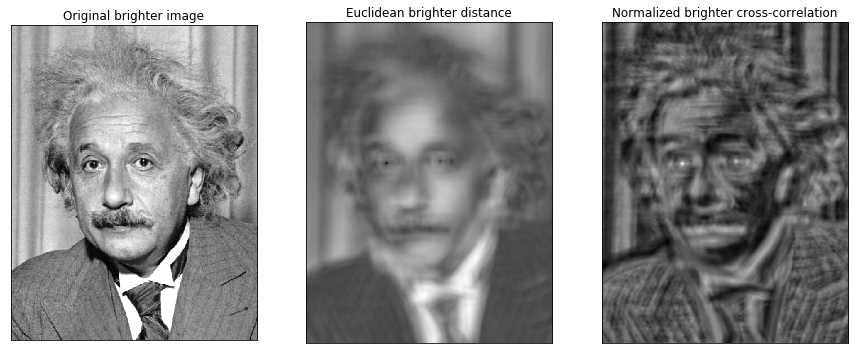

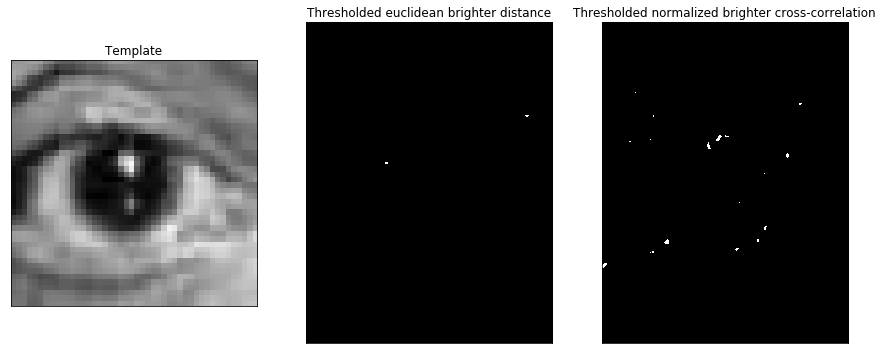

In [8]:
# Show the images
visualize3(einstein_brighter, euclidean_br_img, cross_correlated_br_img, 'Original brighter image', 'Euclidean brighter distance', 'Normalized brighter cross-correlation')
visualize3(eye_template, threshold_euc_br_img, threshold_cross_br_img, 'Template', 'Thresholded euclidean brighter distance', 'Thresholded normalized brighter cross-correlation')

1.3 Display the results on `einstein_mask.png`:

In [9]:
# Your solution here

# Load the image
einstein_mask = io.imread('./images/einstein_mask.png')

# Call the functions
euclidean_mask_img = euclidean_temp_match(einstein_mask, eye_template)
threshold_euc_mask_img = threshold_image(euclidean_mask_img, 8.6)

cross_correlated_mask_img = cross_correlation_match(einstein_mask, eye_template)
threshold_cross_mask_img = threshold_image(cross_correlated_mask_img, -0.45)

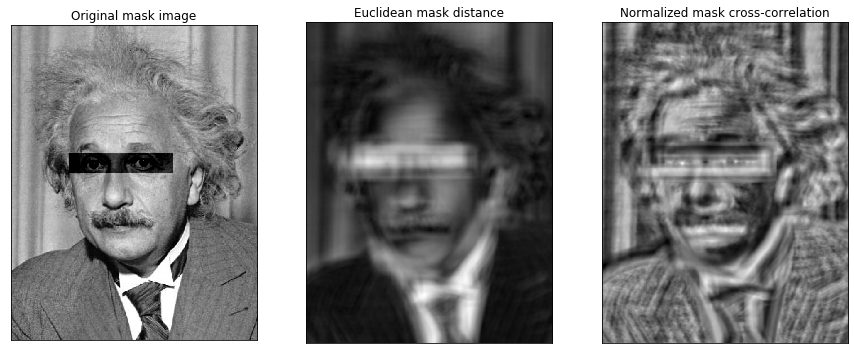

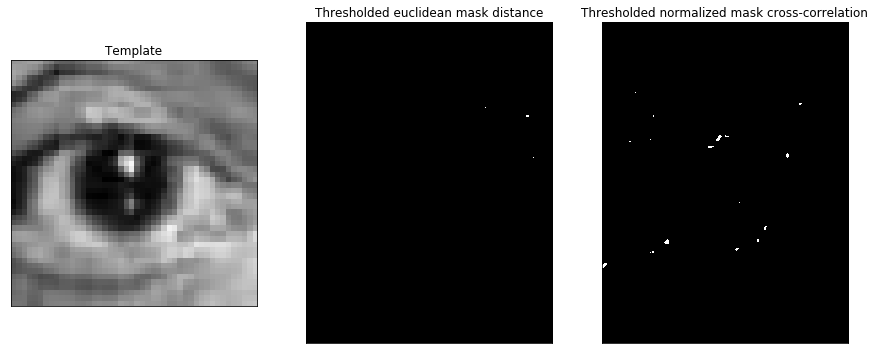

In [10]:
# Show the images
visualize3(einstein_mask, euclidean_mask_img, cross_correlated_mask_img, 'Original mask image', 'Euclidean mask distance', 'Normalized mask cross-correlation')
visualize3(eye_template, threshold_euc_mask_img, threshold_cross_mask_img, 'Template', 'Thresholded euclidean mask distance', 'Thresholded normalized mask cross-correlation')

1.4.
* How does the minimum distance between the template and the image change? 
* What are the minimal distance pixels in the correlation images? 
* What are the distances between the template and the image around the eyes of the image? 

In [11]:
# Your solution here

1.5 How does the result of the template matching change if instead the template is the one that changes its contrast (for example if you make it clearer or darker)? To this purpose, use the 'eye_br.png' template.

In [12]:
# Your solution here

# Load the image
eye_br_template = io.imread('./images/eye_br.png')

# Call the functions
euclidean_eye_br_img = euclidean_temp_match(einstein_img, eye_br_template)
threshold_euc_eye_br_img = threshold_image(euclidean_eye_br_img, 8.6)

cross_correlated_eye_br_img = cross_correlation_match(einstein_img, eye_br_template)
threshold_cross_eye_br_img = threshold_image(cross_correlated_eye_br_img, -0.45)

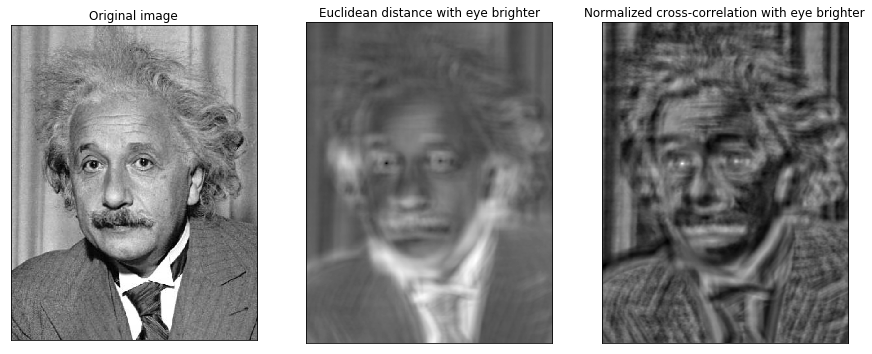

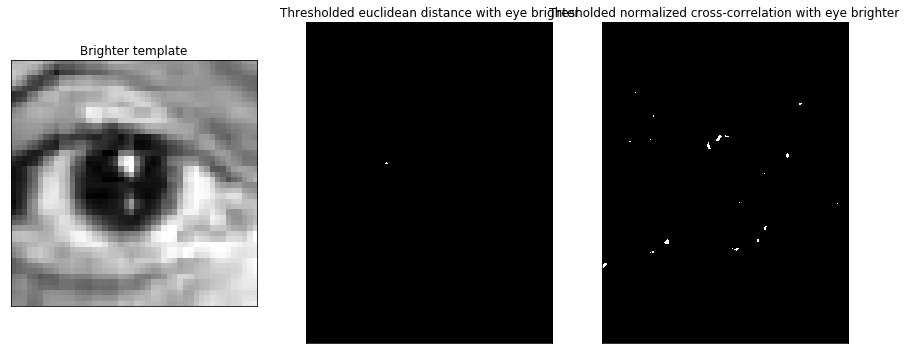

In [13]:
# Show the images
visualize3(einstein_img, euclidean_eye_br_img, cross_correlated_eye_br_img, 'Original image', 'Euclidean distance with eye brighter', 'Normalized cross-correlation with eye brighter')
visualize3(eye_br_template, threshold_euc_eye_br_img, threshold_cross_eye_br_img, 'Brighter template', 'Thresholded euclidean distance with eye brighter', 'Tresholded normalized cross-correlation with eye brighter')

1.6 Check how the result changes if the template is rotated. Visualize the template and its rotation by 10º, 15º and 20º. Obtain again the template matching using the Euclidean distance and normalized cross-correlation.
Help: use the function rotate() in skimage.transform

In [14]:
# Your solution here

# Rotate the template (10°, 15° and 20° respectively)
eye_template_10 = rotate(eye_template, 10, resize=True)
eye_template_15 = rotate(eye_template, 15, resize=True)
eye_template_20 = rotate(eye_template, 20, resize=True)

In [1]:
# Call the functions over Einstein image and the Template rotated 10°
euclidean_img_eye_template_10 = euclidean_temp_match(einstein_img, eye_template_10)
threshold_euc_img_eye_template_10 = threshold_image(euclidean_img_eye_template_10, 8.6)

cross_correlated_img_eye_template_10 = cross_correlation_match(einstein_img, eye_template_10)
threshold_cross_img_eye_template_10 = threshold_image(cross_correlated_img_eye_template_10, -0.45)

NameError: name 'euclidean_temp_match' is not defined

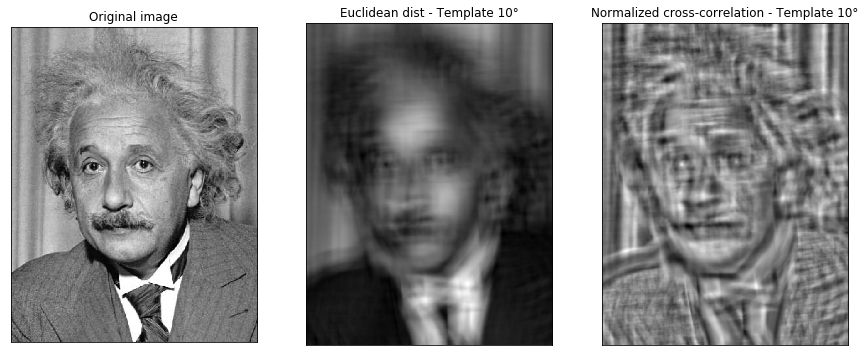

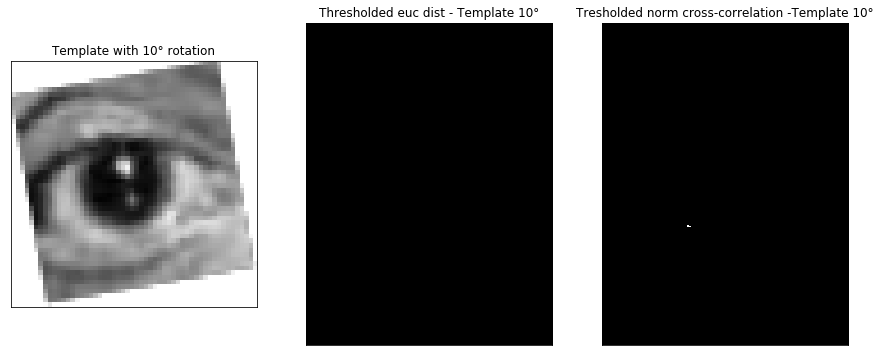

In [16]:
# Show the images
visualize3(einstein_img, euclidean_img_eye_template_10, cross_correlated_img_eye_template_10, 'Original image', 'Euclidean dist - Template 10°', 'Normalized cross-correlation - Template 10°')
visualize3(eye_template_10, threshold_euc_img_eye_template_10, threshold_cross_img_eye_template_10, 'Template with 10° rotation', 'Thresholded euc dist - Template 10°', 'Tresholded norm cross-correlation -Template 10°')

In [17]:
# Call the functions over Einstein image and the Template rotated 15°
euclidean_img_eye_template_15 = euclidean_temp_match(einstein_img, eye_template_15)
threshold_euc_img_eye_template_15 = threshold_image(euclidean_img_eye_template_15, 8.6)

cross_correlated_img_eye_template_15 = cross_correlation_match(einstein_img, eye_template_15)
threshold_cross_img_eye_template_15 = threshold_image(cross_correlated_img_eye_template_15, -0.45)

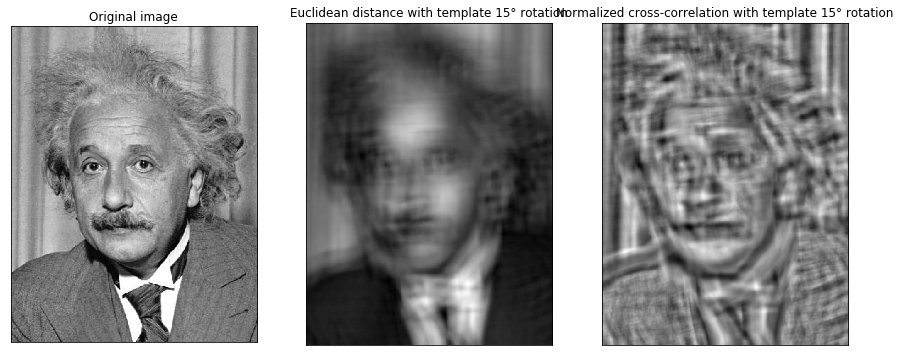

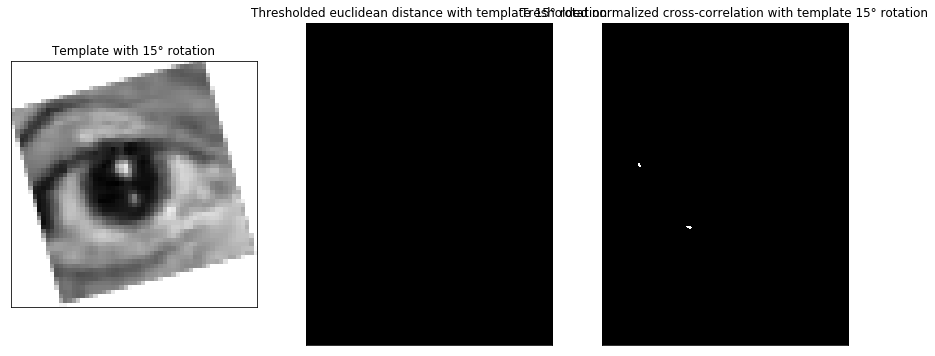

In [18]:
# Show the images
visualize3(einstein_img, euclidean_img_eye_template_15, cross_correlated_img_eye_template_15, 'Original image', 'Euclidean distance with template 15° rotation', 'Normalized cross-correlation with template 15° rotation')
visualize3(eye_template_15, threshold_euc_img_eye_template_15, threshold_cross_img_eye_template_15, 'Template with 15° rotation', 'Thresholded euclidean distance with template 15° rotation', 'Tresholded normalized cross-correlation with template 15° rotation')

In [19]:
# Call the functions over Einstein image and the Template rotated 20°
euclidean_img_eye_template_20 = euclidean_temp_match(einstein_img, eye_template_20)
threshold_euc_img_eye_template_20 = threshold_image(euclidean_img_eye_template_20, 8.6)

cross_correlated_img_eye_template_20 = cross_correlation_match(einstein_img, eye_template_20)
threshold_cross_img_eye_template_20 = threshold_image(cross_correlated_img_eye_template_20, -0.45)

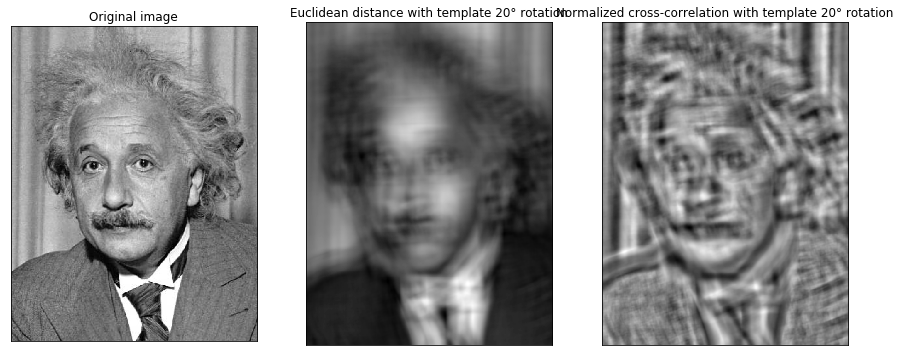

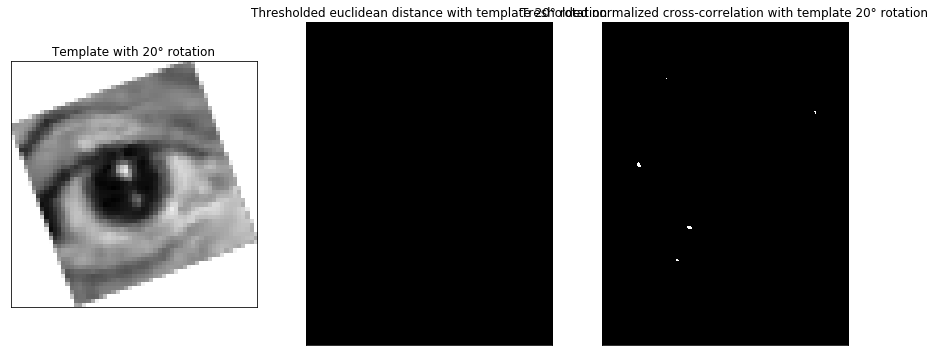

In [20]:
# Show the images
visualize3(einstein_img, euclidean_img_eye_template_20, cross_correlated_img_eye_template_20, 'Original image', 'Euclidean distance with template 20° rotation', 'Normalized cross-correlation with template 20° rotation')
visualize3(eye_template_20, threshold_euc_img_eye_template_20, threshold_cross_img_eye_template_20, 'Template with 20° rotation', 'Thresholded euclidean distance with template 20° rotation', 'Tresholded normalized cross-correlation with template 20° rotation')

1.7 Comment what is the template matching process, what advantages and disadvantages it has, how sensible is to image deformation in photometric and spatial dimensions, what parameters it has and which measure for image comparisons works better.

In [ ]:
# Your solution here

# 2 Histogram of Oriented Gradients

In this section we will treat the following topic: HOG image descriptor. Application to object (person) detection.

The Histogram of Oriented Gradients (HOG) feature descriptor is classical image descriptor for object detection.

Given the image 'person_template.png' and the folder '/images/TestPersonImages/', apply the HOG descriptor in order to detect where there is a person in the images. To this purpose, apply the "sliding window" technique. We use images from GRAZ 01 data from [INRIA datasets](http://pascal.inrialpes.fr/data/human/).

2.1. Read the template ('person_template.png'), obtain its HOG descriptor (with the optimal parameters) and visualize it.

Help: the HOG detector function is in the skimage.feature library ([Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py)).

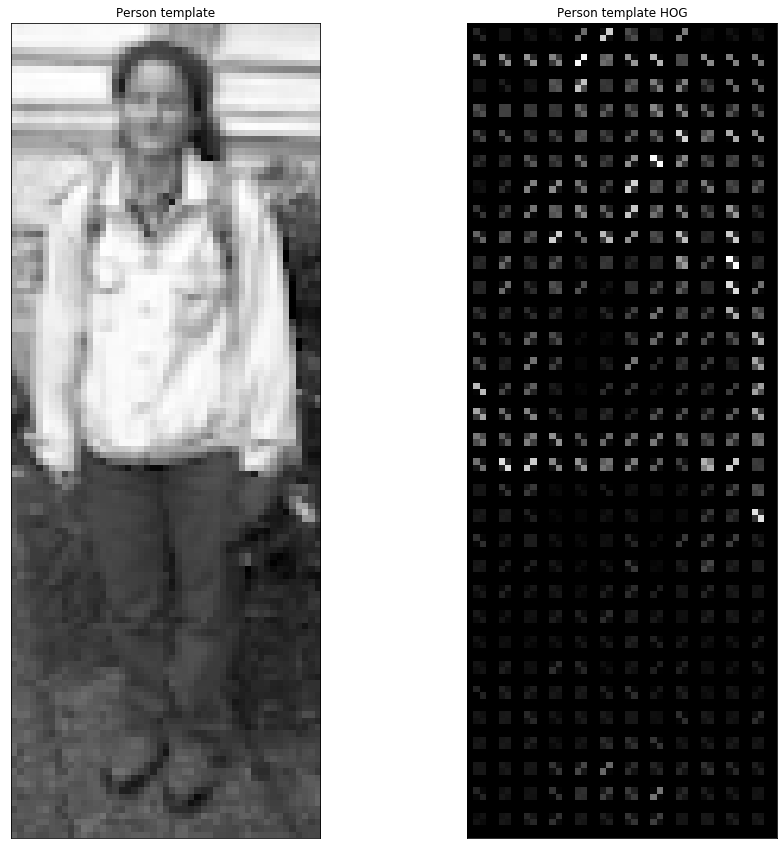

In [24]:
# Your solution here

# Load the image and convert it to float and then to gray scale
person_template = io.imread('./images/person_template.bmp')
person_template = rgb2gray(img_as_float(person_template))

# Get the
fd_person_template, hog_image_person_template = hog(person_template, orientations=8, pixels_per_cell=(4, 4),
                    cells_per_block=(2, 2), visualize=True)

# Show
visualize2(person_template, hog_image_person_template, 'Person template', 'Person template HOG')

2.2. Apply the HOG descriptor on the complete set of images for person detection.

a) Read images from the folder "TestPersonImages", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the person template. 

b) Visualize the location in the image that is the most similar to the person template using the distance between the template and test image descriptors.

Display the results of every person detection following this format:

<img src="images_notebook/hog.png" width="800" height="100">

In [25]:
persons_collections = io.ImageCollection('./images/TestPersonImages/*')

for person in persons_collections:
    fd_person, hog_image_person = hog(person, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

    #visualize2(person, hog_image_person, 'Person template', 'Person template HOG')

In [26]:
def visualize_persons(person, im, im_result, x, y, person_width, person_height):
        fig=plt.figure(figsize=(18,3))
        ax1=plt.subplot(1,3,1)
        ax2=plt.subplot(1,3,2)
        ax3=plt.subplot(1,3,3, sharex=ax2, sharey=ax2)
        ax1.axis('off')
        ax1.set_title('Person template')
        ax1.imshow(person, cmap='gray')
        ax2.set_title('Best region match')
        ax2.axis('off')
        ax2.imshow(im, cmap='gray')
        ax3.set_title('HOG distances')
        ax3.axis('off')
        ax3.imshow(im_result, cmap='gray')
        rect2 = plt.Rectangle((x - person_width / 2, y - person_height / 2), person_width, person_height, edgecolor='r', facecolor='none')
        rect3 = plt.Rectangle((x - person_width / 2, y - person_height / 2), person_width, person_height, edgecolor='r', facecolor='none')
        ax2.add_patch(rect2)
        ax3.add_patch(rect3)

        plt.show()

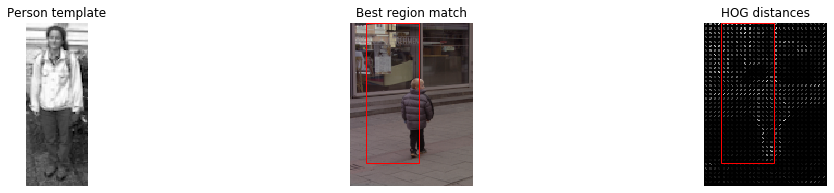

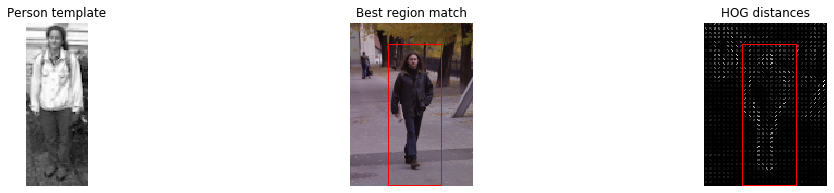

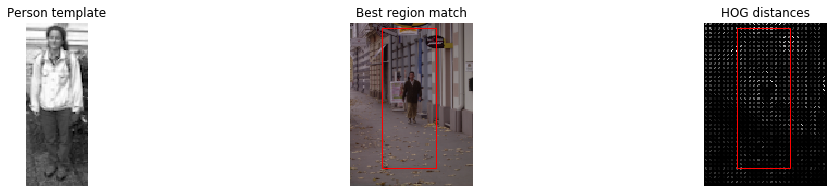

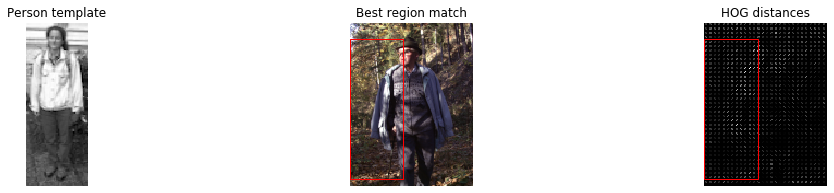

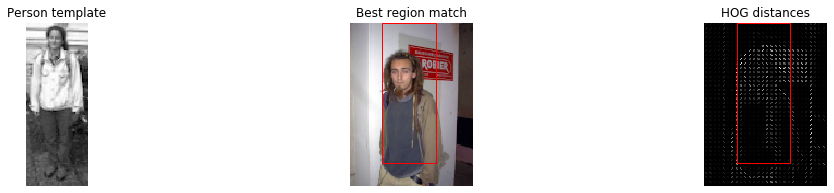

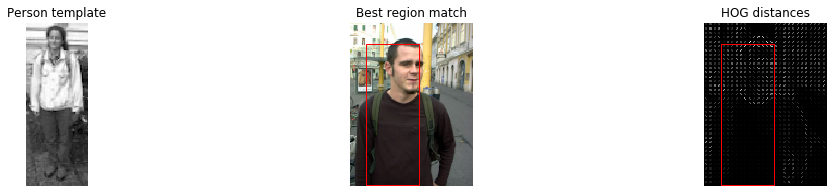

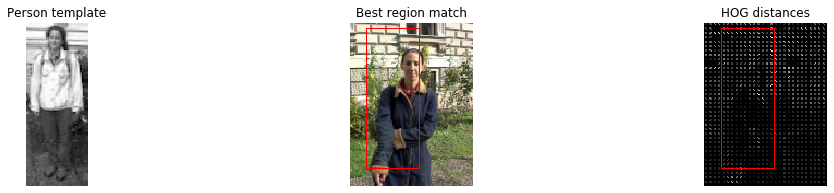

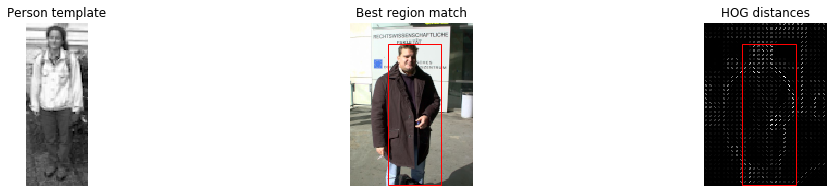

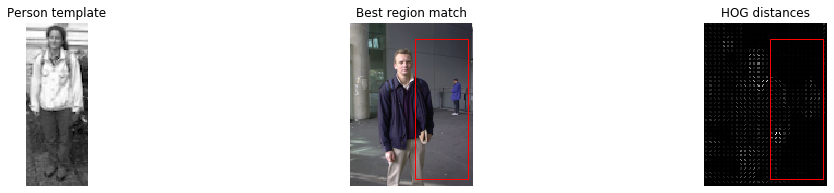

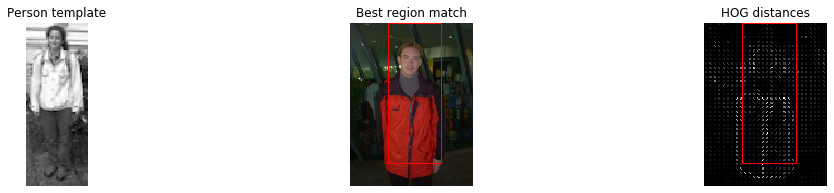

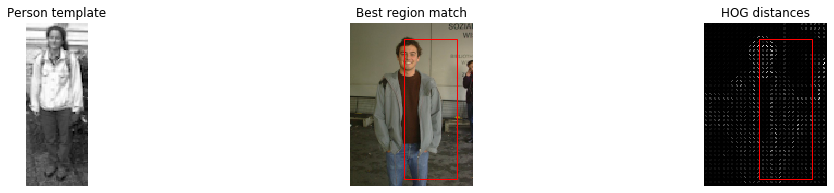

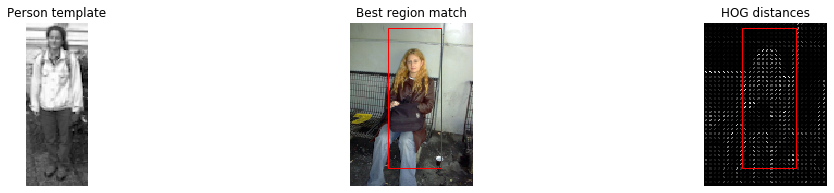

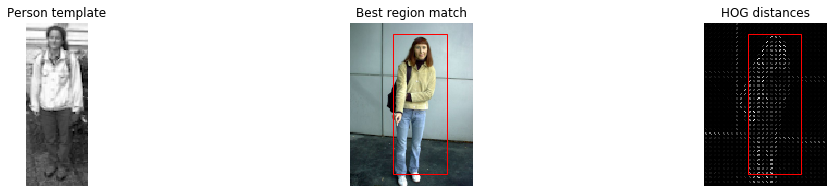

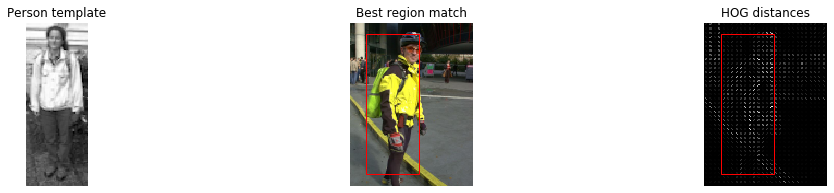

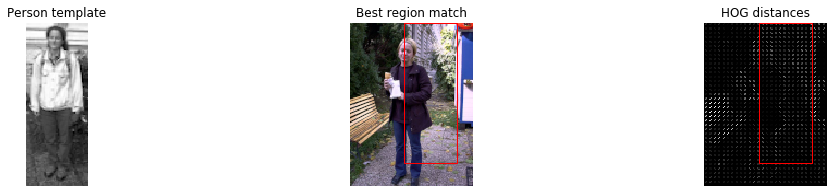

In [27]:
persons_collections = io.ImageCollection('./images/TestPersonImages/*')

fd_person_temp, hog_person_temp = hog(person_template, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)

for person in persons_collections:
    person_gray = rgb2gray(person)
    im_result = np.zeros((person_gray.shape))
    
    person_height, person_width = person_gray.shape
    person_temp_height, person_temp_width = person_template.shape

    for i in range(0, person_height - person_temp_height, 5):
        for j in range(0, person_width - person_temp_width, 5):
            region = person[i : (i + person_temp_height), j : (j + person_temp_width)]
            fd_region, hog_region = hog(region, orientations=8, pixels_per_cell=(4, 4),
                                       cells_per_block=(2, 2), visualize=True)
            im_result[(i + round(person_temp_height / 2)), (j + round(person_temp_width / 2))] = np.dot(fd_person_temp, fd_region)

    ij = np.unravel_index(np.argmax(im_result), im_result.shape)
    x, y = ij[::-1]

    fd_per, hog_person = hog(person, orientations=8, pixels_per_cell=(4, 4),
                          cells_per_block=(2, 2), visualize=True)

    visualize_persons(person_template, person, hog_person, x, y, person_temp_width, person_temp_height)

In [ ]:
# Your solution here

In [ ]:
# Your solution here

In [ ]:
# Your solution here

3.3. 
- Count on how many images were the persons detected correctly and discuss the failures. What do you think can be the reasons for the failures?
- Discuss what are the parameters of the HOG algorithm. Test several values of the parameters up to your criterion to show which are the optimal values for the person detection problem.
- Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).

In [ ]:
# Your solution here

# 3 ORB feature detector and binary descriptor

Let us consider the problem of feature extraction that contains two subproblems: 
- feature location, 
- image feature description.

Let us focus on ORB, an approximation of SIFT method, and analyse if ORB is  scale and rotation invariant, a property that is very important for real-time applications.

**Hint:** `ORB` is a function within the module `skimage.feature`
                             
**Help**: We suggest to have a look at the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) how to compute the ORB descriptors and find the descriptors match. You can use the function match_descriptors from `skimage.feature` module in order to compute and show the similar detected descriptors of the given images. 

3.1
(a) Detect the censure in the image `starbucks4.jpg`. 

(b) Analyze and discuss the effect of different values of the parameters in censure function.



In [ ]:
"""
This function detect the censure of the image.
@params:
    img: image to be censured
"""
def get_censure(img):

    # Censuring the image
    detector = CENSURE()
    detector.detect(img_grayscale)

    # Display
    plt.imshow(img_grayscale)
    plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
                  2 ** detector.scales, facecolors='none', edgecolors='r')
    plt.title("Censured Image", fontsize=16)
    plt.axis('off')

    plt.show()

# Load image
img = io.imread('images/starbucks4.jpg')

# Convert to grayscale
img_grayscale = rgb2gray(img)

get_censure(img)

## Questions
#### Analyze and discuss the effect of different values of the parameters in censure function.
In CENSURE keypoint detector function we have the following parameters:
* min_scale: the minimal scale to extract keypoints.
* max_scale: the maximum scale to extract keypoints. The keypoints will be extracted from all the scales except the first and the last.
* mode: we have 'DoB' (better performance), 'Octagon' and 'STAR' (both better features) as possible values. These three modes represent the shape of the bi-level filter.
* non_max_threshold: treshold used in order to suppress maxs and mins with a weak magnitude response.
* line_threshold: treshold used in order to reject points which have ratio of principal
Threshold for rejecting interest points which have ratio of principal curvatures greater than this value.

3.2 

(a) Detect the correspondences between the model image `starbucks.jpg` with the scene image `starbucks4.jpg`. You can adapt the code from the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) above. 

Define a function get_ORB implementing the algorithm in order to be able to apply it on different images. Comment the code in detail.

**Hint: If the function plot_matches() gives you an error you can use the plot_matches_aux() at the end of this file.**

(b) Analyze and discuss the effect of different values of the parameter `max_ratio` in the match_descriptors function.


In [ ]:
"""
This function applies the ORB feature detector between 2 given images and display the matches

@params
    image1: image1 to compare with image2
    image2: image2 to compare with image1
"""
def get_ORB(image1, image2, max_ratio=1.0):
    
    # Extract descriptor
    descriptor_extractor = ORB(n_keypoints=200)

    # Extract descriptors of images and get the points where finds a match
    descriptor_extractor.detect_and_extract(image1)
    keypoints1 = descriptor_extractor.keypoints
    descriptors1 = descriptor_extractor.descriptors
    
    descriptor_extractor.detect_and_extract(image2)
    keypoints2 = descriptor_extractor.keypoints
    descriptors2 = descriptor_extractor.descriptors

    # Array of the pixels which matches between both images
    matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True, max_ratio=max_ratio)

    # Display the matches
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,15))
    
    plt.gray()
    
    plot_matches(ax, image1, image2, keypoints1, keypoints2, matches12)
    ax.axis('off')
    ax.set_title("Comparing image 1 and image 2 with ORB feature descriptor (max_ratio = " + str(max_ratio) + ")"
                 , fontsize=18)

    plt.show()

In [ ]:
# Loading images
img_1 = io.imread('images/starbucks.jpg')
img_2 = io.imread('images/starbucks4.jpg')

# Convert to grayscale
img_1_grayscale = rgb2gray(img_1)
img_2_grayscale = rgb2gray(img_2)

# Computing the ORB descriptor
get_ORB(img_1_grayscale, img_2_grayscale)

## Questions
#### Analyze and discuss the effect of different values of the parameter max_ratio in the match_descriptors function.
Using maximum ratio we can specify the max ratio of distance between first and second closest descriptor. This parameter is useful in order to filt ambigous matches between the descriptors.
Next, we can observe the results using different values.

3.2 Repeate the experiment comparing the "starbucks.jpg" image as a model, and showing its matches to all Starbucks images, sorting them based on their similarity to the model. Comment when does the algorithm work better. 

In [ ]:
"""
This function applies the ORB feature detector and gives us the number of matches between both images

@params:
    image1: image to compare with image2
    image2: image to compare with image1
    return: number of matches
"""
def get_number_matches_ORB(image1, image2):
    # Extract descriptor
    descriptor_extractor = ORB(n_keypoints=200)

    # Extract descriptors of images and get the points where finds a match
    descriptor_extractor.detect_and_extract(image1)
    keypoints1 = descriptor_extractor.keypoints
    descriptors1 = descriptor_extractor.descriptors
    
    descriptor_extractor.detect_and_extract(image2)
    keypoints2 = descriptor_extractor.keypoints
    descriptors2 = descriptor_extractor.descriptors

    # Array of the pixels which matches between both images
    matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)

    return len(matches12)
"""
This function sort the computing matches of each image in img_list compared with img_model.

@params
    imgs_list: list with all the images
    img_model: image to compare with
    return: a dictionary sorted with the matches and the number of matches ordered
"""
def sort_by_matches(imgs_list, img_model, max_to_min=False):
    dict_similarities = {get_number_matches_ORB(img_model, imgs_list[i]) : i for i in range(len(imgs_list))}
    if max_to_min:
        return (dict_similarities, sorted(dict_similarities.keys(), reverse=True))
    return (dict_similarities, sorted(dict_similarities.keys()))

In [ ]:
# Load images
img_1 = io.imread('images/starbucks.jpg')
img_2 = io.imread('images/starbucks2.png')
img_4 = io.imread('images/starbucks4.jpg')
img_5 = io.imread('images/starbucks5.png')
img_6 = io.imread('images/starbucks6.jpg')
img_cup = io.imread('images/starbucksCup.jpg')

# Convert to grayscale
img_1_grayscale = rgb2gray(img_1)
img_2_grayscale = rgb2gray(img_2)
img_4_grayscale = rgb2gray(img_4)
img_5_grayscale = rgb2gray(img_5)
img_6_grayscale = rgb2gray(img_6)
img_cup_grayscale = rgb2gray(img_cup)

# Create a list
list_of_images = [img_1_grayscale, img_2_grayscale, img_4_grayscale,
                    img_5_grayscale, img_6_grayscale, img_cup_grayscale]

# Sort in order of min to max similarity. Change max_to_min = True if you want to order from max to min similarity
dict_similarities, matches_sorted = sort_by_matches(list_of_images, img_1_grayscale, max_to_min=False)

# Display
for i in matches_sorted:
    get_ORB(img_1_grayscale, list_of_images[dict_similarities[i]])

## Questions
#### Comment when does the algorithm work better.
This algorithm works better with the images which have a similar size and shape as the model image.

3.3 Repeate the experiment in 3.2: 
- Changing the orientation of the model image by rotating it and comparing it with its original version. Help: you can use the rotate() function from skimage.transform 
- Change the scale and orientation of the scene image and compare it with the model image.

Help: To do so, you can use the function given below as example:

import transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(image2transform, rotationdegrees)

or

tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_transformed = tf.warp(image2transform, tform)

In [ ]:
# Rotate image 180 degrees
img_rotated = transform.rotate(img_1_grayscale, 180)
get_ORB(img_1_grayscale,img_rotated)

In [ ]:
# Rescale image
tform = transform.AffineTransform(scale=(1.2, 1.2))
img_rescaled = transform.warp(img_rotated, tform)
get_ORB(img_1_grayscale,img_rescaled)

3.4 **(Optional)** Repeat the experiment (3.1 to 3.3) with a new group of images. You could use Coca-Cola advertisements or from another famous brand, easily to find on internet.



In [ ]:
# Load images
img_1 = io.imread('images/CocaColaImages/cocacola1.jpg')
img_2 = io.imread('images/CocaColaImages/cocacola2.png')
img_3 = io.imread('images/CocaColaImages/cocacola3.jpg')
img_4 = io.imread('images/CocaColaImages/cocacola4.jpg')
img_5 = io.imread('images/CocaColaImages/cocacola5.png')
img_6 = io.imread('images/CocaColaImages/cocacola6.jpg')
img_logo = io.imread('images/CocaColaImages/cocacola_logo.png')

# Convert to grayscale
img_1_grayscale = rgb2gray(img_1)
img_2_grayscale = rgb2gray(img_2)
img_3_grayscale = rgb2gray(img_3)
img_4_grayscale = rgb2gray(img_4)
img_5_grayscale = rgb2gray(img_5)
img_6_grayscale = rgb2gray(img_6)
img_logo_grayscale = rgb2gray(img_logo)

In [ ]:
# PART 3.1
get_censure(img_1_grayscale)

In [ ]:
# PART 3.2
get_ORB(img_1_grayscale, img_3_grayscale)

In [ ]:
# PART 3.2

# Create a list
list_of_images = [img_1_grayscale, img_2_grayscale, img_3_grayscale, img_4_grayscale,
                    img_5_grayscale, img_6_grayscale, img_logo_grayscale]

# Sort in order of min to max similarity. Change max_to_min = True if you want to order from max to min similarity
dict_similarities, matches_sorted = sort_by_matches(list_of_images, img_logo_grayscale, max_to_min=False)

# Display
for i in matches_sorted:
    get_ORB(img_logo_grayscale, list_of_images[dict_similarities[i]])

In [ ]:
# PART 3.3

# Rotate image 180 degrees
img_rotated = transform.rotate(img_1_grayscale, 180)
get_ORB(img_1_grayscale,img_rotated)

In [ ]:
# Rescale image
tform = transform.AffineTransform(scale=(1.2, 1.2))
img_rescaled = transform.warp(img_rotated, tform)
get_ORB(img_1_grayscale,img_rescaled)

3.5 Analysis of the applied techniques and results

- What are the advantages of the ORB object detection with respect to the HOG and template object detector?

- What would happen if you analyse an image that does not contain the Starbucks logo? 

- Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it) 

## Questions
#### What are the advantages of the ORB object detection with respect to the HOG and template object detector?
The biggest advantage we can observe is that the ORB object detection is less sensitive to rotations. So, it finds better the objects in the images.
#### What would happen if you analyse an image that does not contain the Starbucks logo?
If there is no logo in the image which we want to compare, the algorithm will find other points similarities such as in the image starbucks6.jpg (the worst in similarities).
#### Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it)
SIFT could be a good algorithm since anlyses the corners and the parallels lines in the images which could find the similarities we want.

### Appendix

In [ ]:
# In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)